# Welcome to My EDA💙
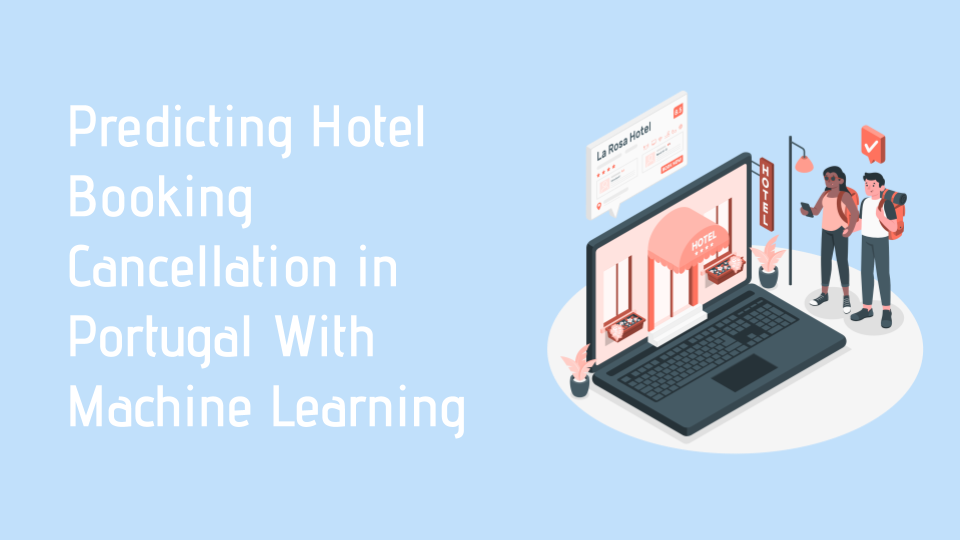

# 1-Define the Problem or Research Question:
----------------------------
**The purpose of this notebook is to perform exploratory data analysis (EDA) on the Hotel Booking Cancellation Prediction.**

## Objectives:
1. **What is the distribution of the number of adults per booking?**
2. **Which room type is booked the most?**
3. **Explore relationships between different features**
4. **Identify key genres and studios**
5. **Examine other relevant features**

## [Research Questions:](#AskingandAnsweringQuestions)
1. **What is the distribution of the number of adults per booking?**
2. **Which room type is booked the most?**
3. **What is the trend of reservations across different months?**
4. **How does lead time impact the average price of bookings?**
5. **Do guests with more special requests pay higher prices?**
6. **How many bookings are repeated vs. new?**
7. **What is the most popular meal type chosen by customers?**
8. **How does the number of children impact the lead time?**
9. **Which market segment contributes the most bookings?**
10. **What is the distribution of the number of weekend and week nights?**
11. **How do repeated guests compare to new guests in terms of average price?**
12. **What are the most common special request counts?**
13. **How does car parking space availability relate to the number of adults in bookings?**
14. **Do customers booking with longer lead times have more special requests?**
15. **What is the trend of average price across different months?**

# 2-Collect Data & Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import boxcox, yeojohnson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv('first_intern_project')

In [3]:
data.shape

(36285, 17)

In [4]:
warnings.filterwarnings("ignore")

# 3-Data Preprocessing

In [5]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [6]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [8]:
print(data.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [9]:
print(data.duplicated().sum())

0


# 4-Analyzing the Data

###  Let's embark on our EDA  journey to uncover insights📊

### 1-Descriptive statistics📈

In [10]:
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### 2-Univariate analysis🔎

In [11]:
numeric_cols = [
    'number of adults', 'number of children', 
    'number of weekend nights', 'number of week nights', 
    'car parking space', 'lead time', 
    'repeated', 'P-C', 'P-not-C', 
    'average price', 'special requests'
]

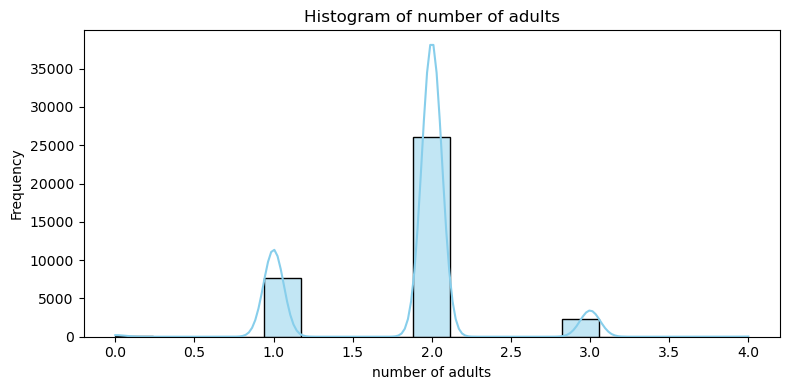

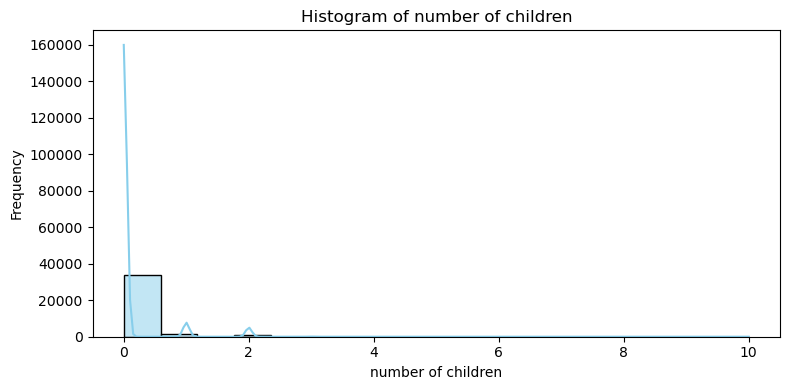

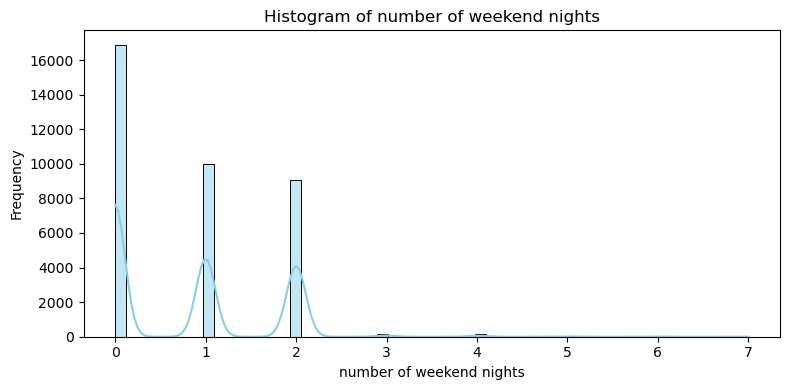

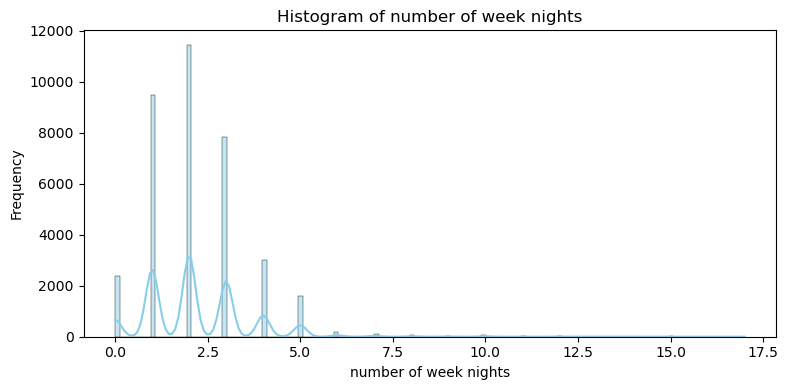

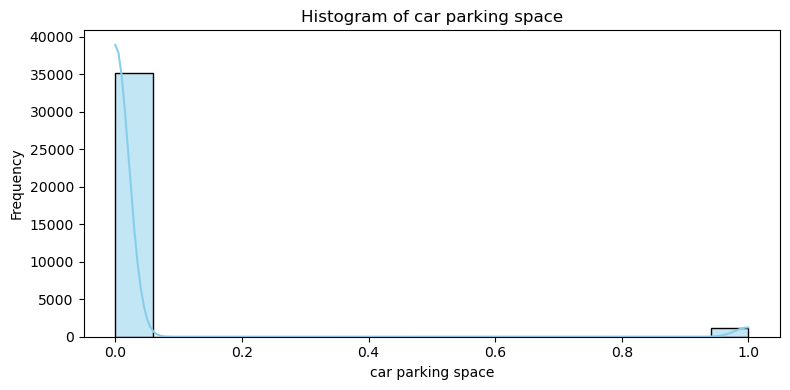

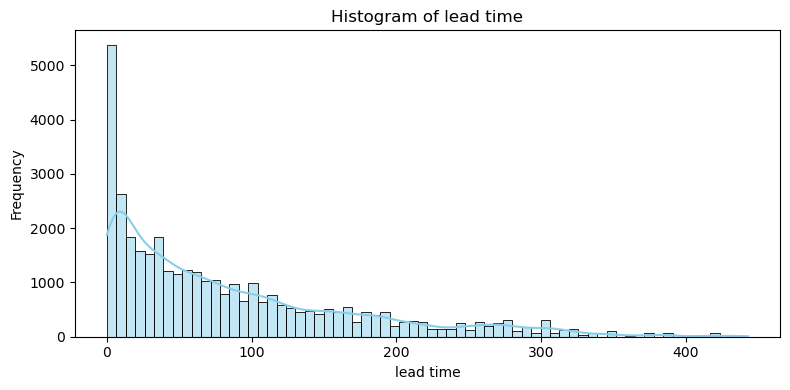

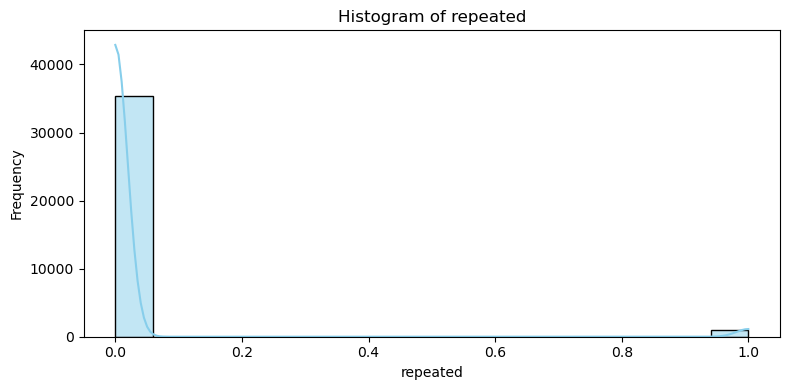

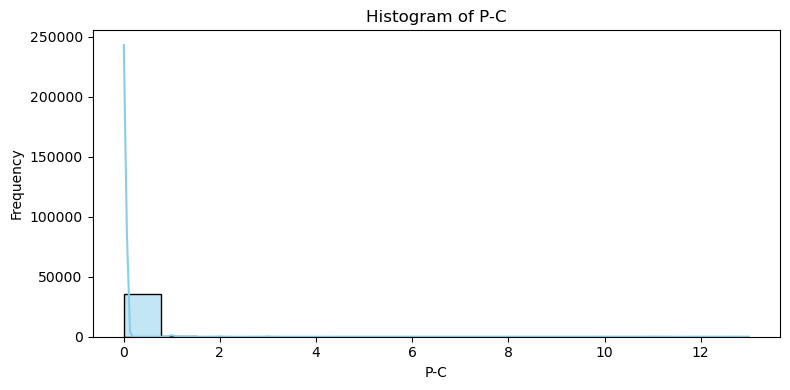

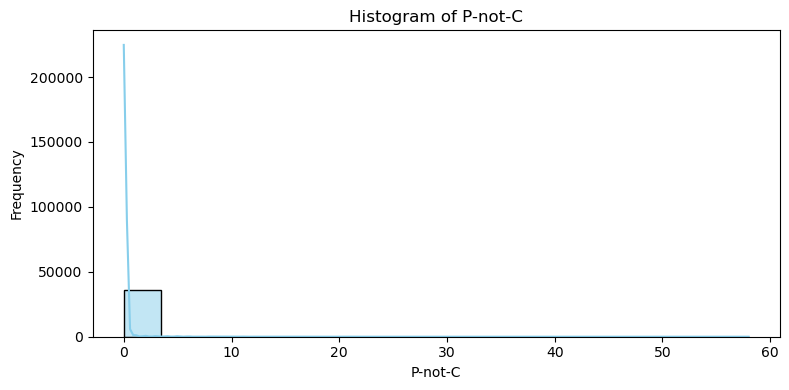

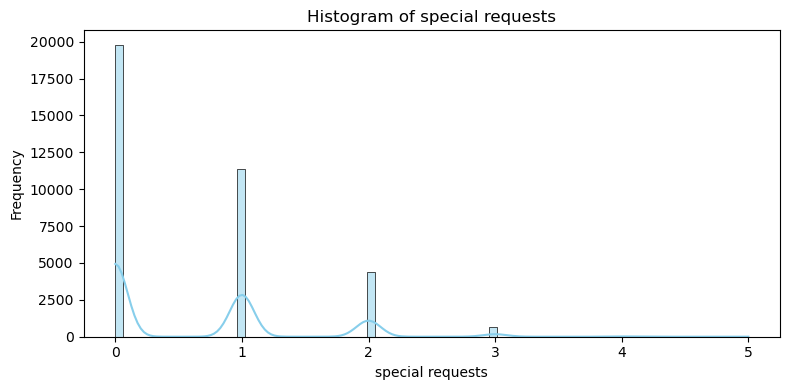

In [12]:
for col in numeric_cols:
    if col in data.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


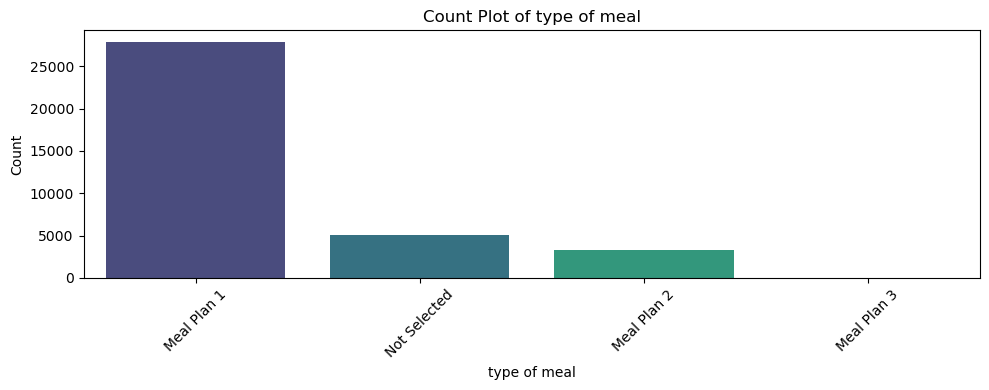


Frequency Table for type of meal:
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: type of meal, dtype: int64


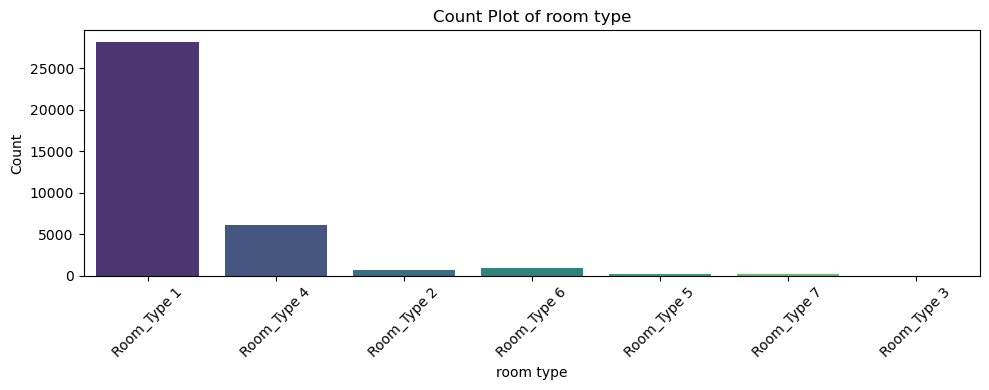


Frequency Table for room type:
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room type, dtype: int64


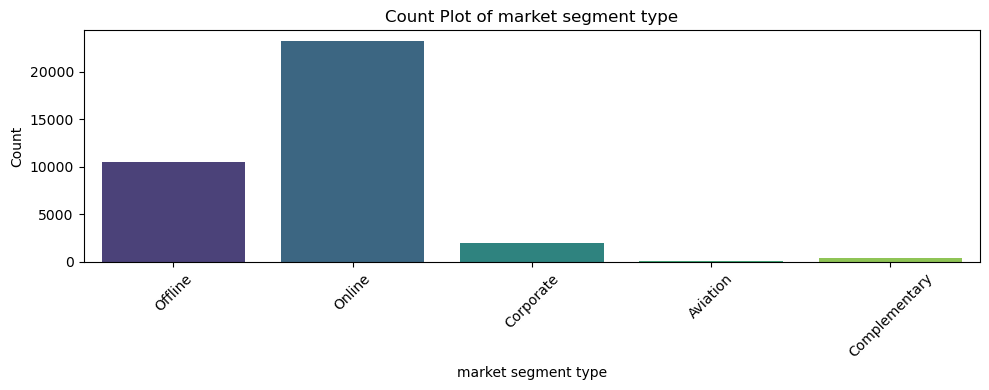


Frequency Table for market segment type:
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: market segment type, dtype: int64


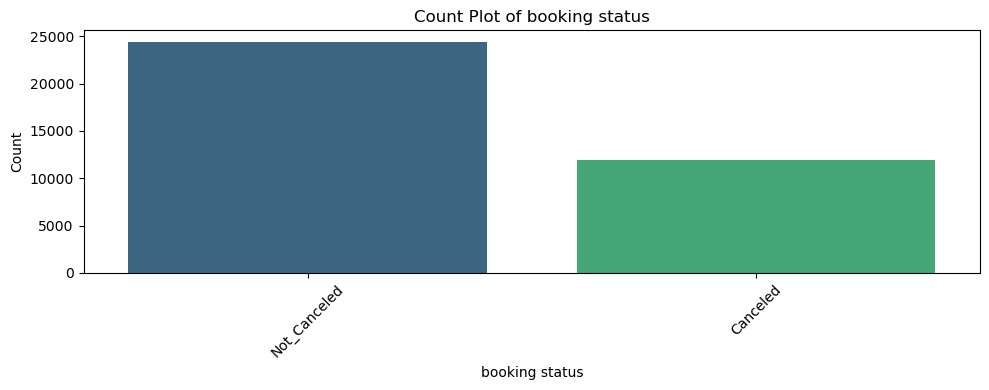


Frequency Table for booking status:
Not_Canceled    24396
Canceled        11889
Name: booking status, dtype: int64


In [13]:
categorical_cols = ['type of meal', 'room type', 'market segment type', 'booking status']

for col in categorical_cols:
    unique_count = data[col].nunique()
    if unique_count > 20: 
        print(f"Skipping {col} (high cardinality: {unique_count} categories)")
        continue
    
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data[col], palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"\nFrequency Table for {col}:")
    print(data[col].value_counts())

Not_Canceled    0.672344
Canceled        0.327656
Name: booking status, dtype: float64


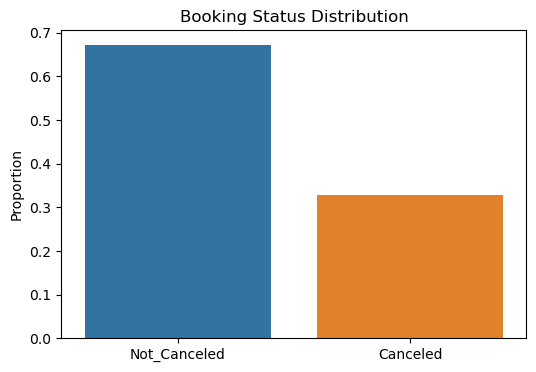

In [14]:
status_counts = data['booking status'].value_counts(normalize=True)
print(status_counts)
plt.figure(figsize=(6, 4))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Booking Status Distribution')
plt.ylabel('Proportion')
plt.show()

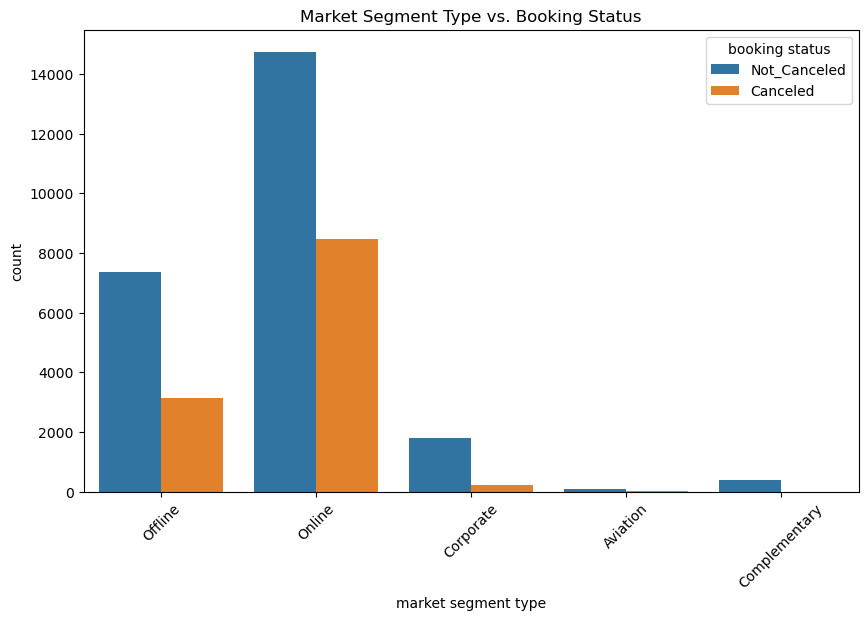

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market segment type', hue='booking status', data=data)
plt.title('Market Segment Type vs. Booking Status')
plt.xticks(rotation=45)
plt.show()

# 3-Bivariate Analysis📈

Text(0.5, 1.0, 'Correlation Matrix of Features')

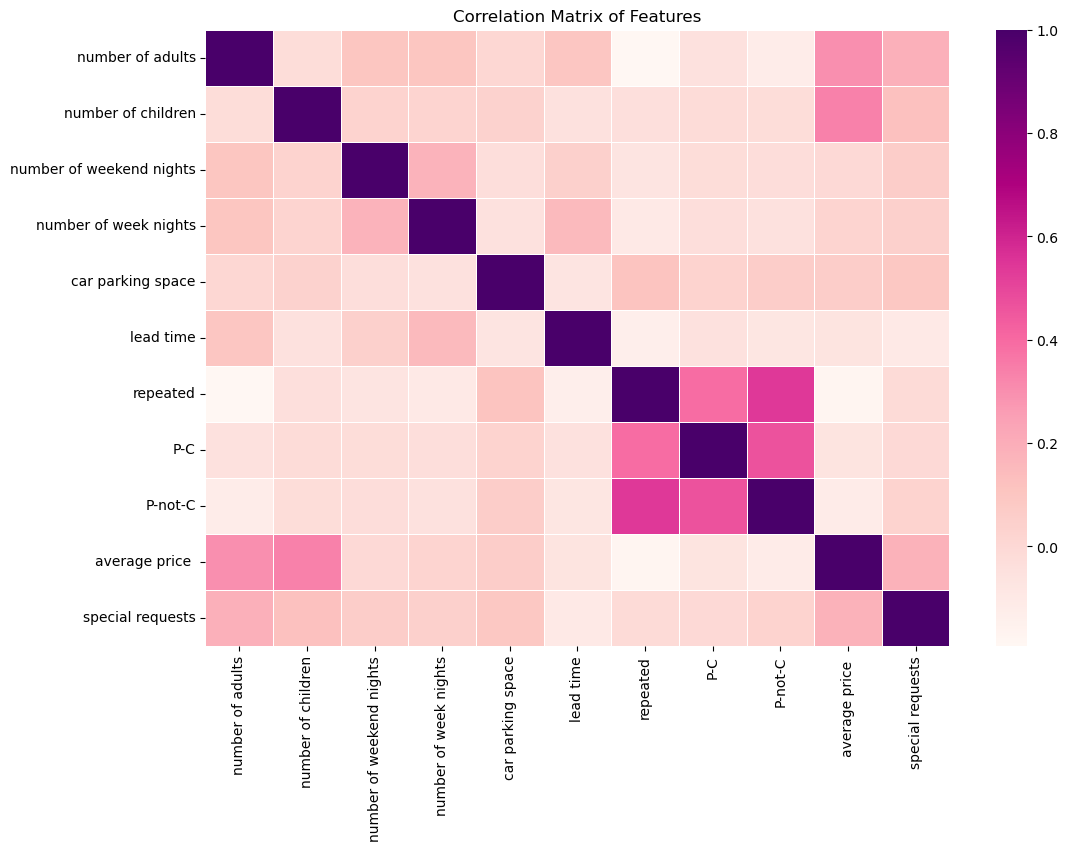

In [16]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='RdPu', linewidths=0.5)
plt.title("Correlation Matrix of Features")

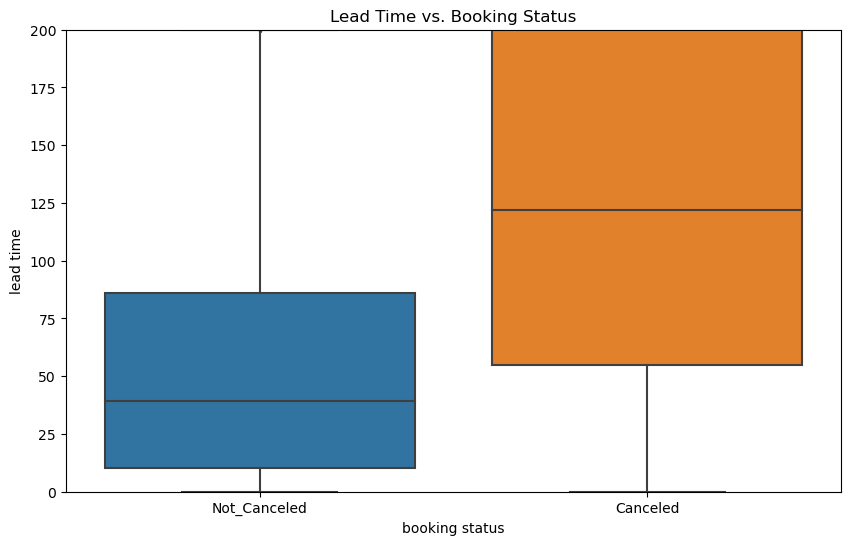

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking status', y='lead time', data=data)
plt.title('Lead Time vs. Booking Status')
plt.ylim(0, 200)  
plt.show()

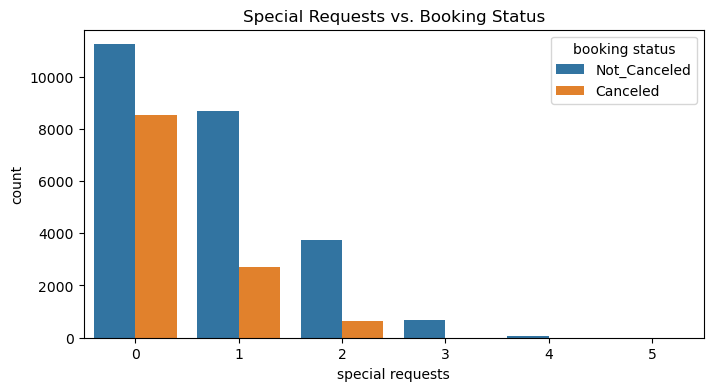

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x='special requests', hue='booking status', data=data)
plt.title('Special Requests vs. Booking Status')
plt.show()

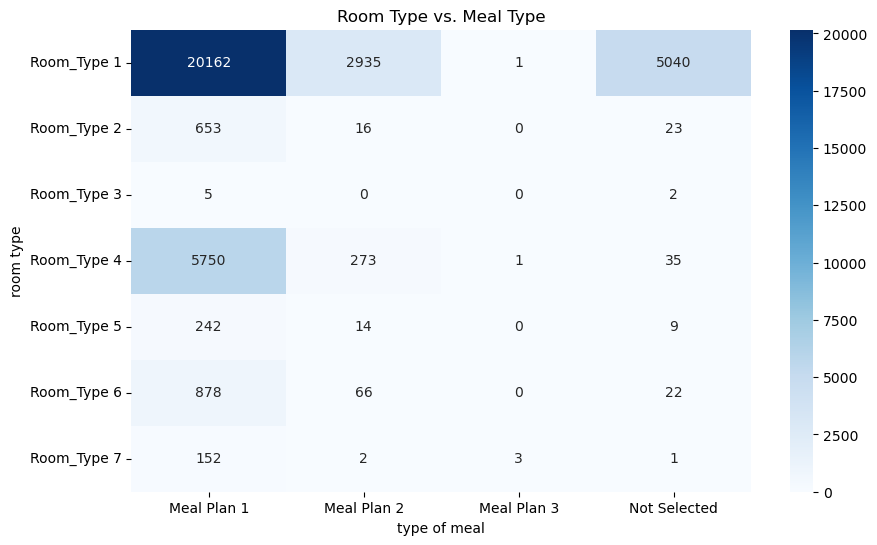

In [19]:
cross_tab = pd.crosstab(data['room type'], data['type of meal'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap='Blues')
plt.title('Room Type vs. Meal Type')
plt.show()

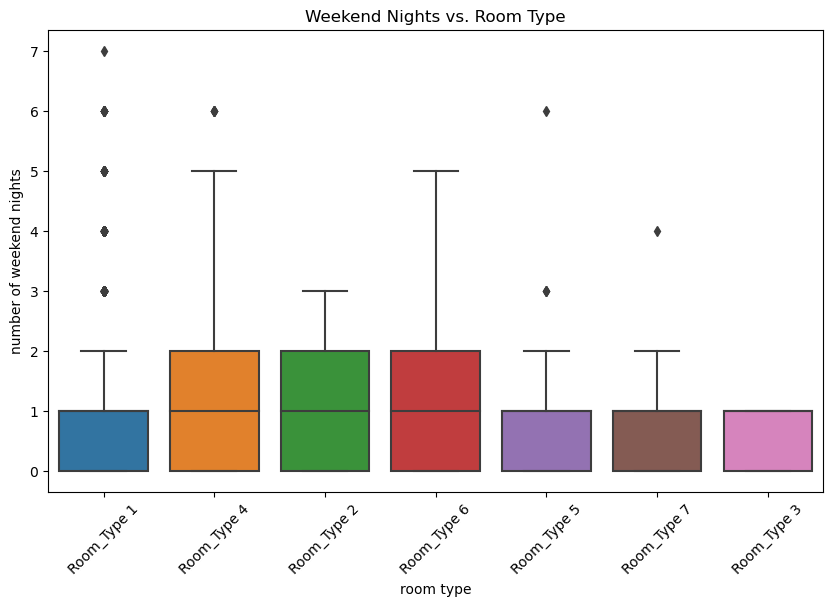

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room type', y='number of weekend nights', data=data)
plt.title('Weekend Nights vs. Room Type')
plt.xticks(rotation=45)
plt.show()

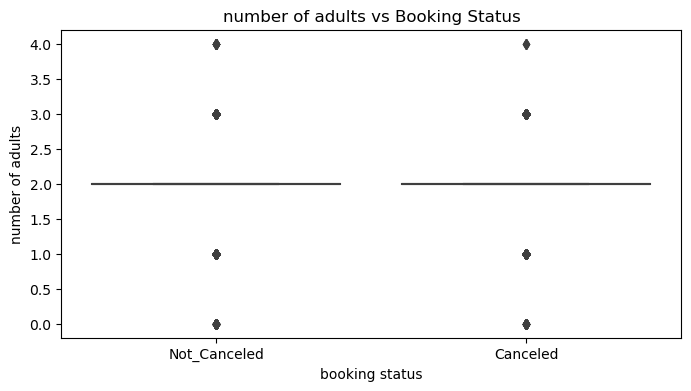

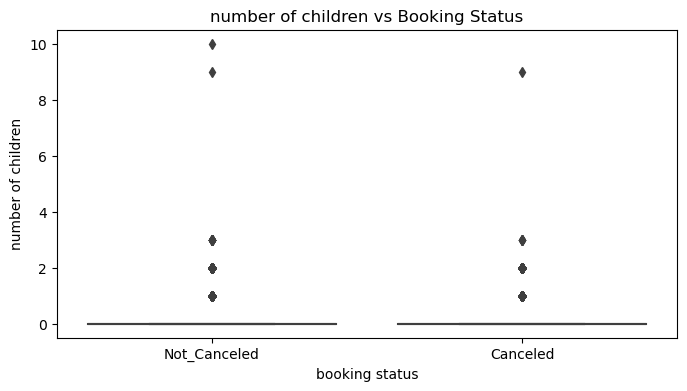

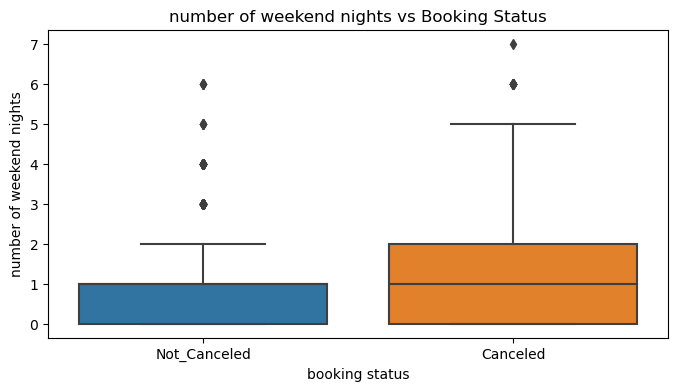

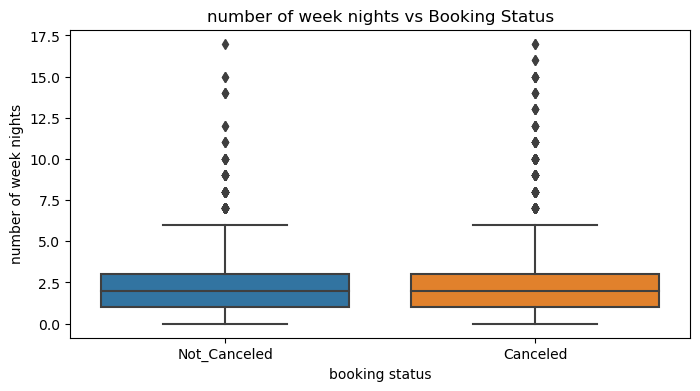

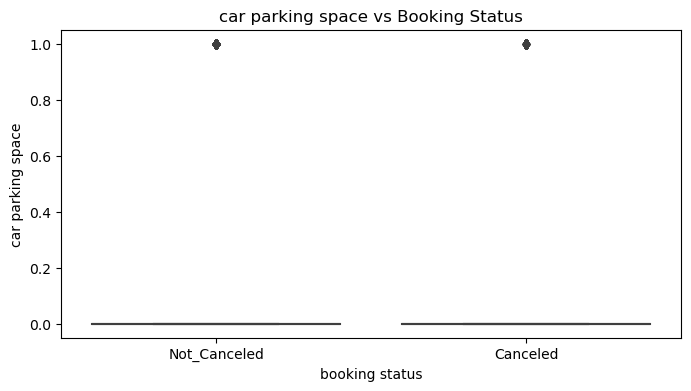

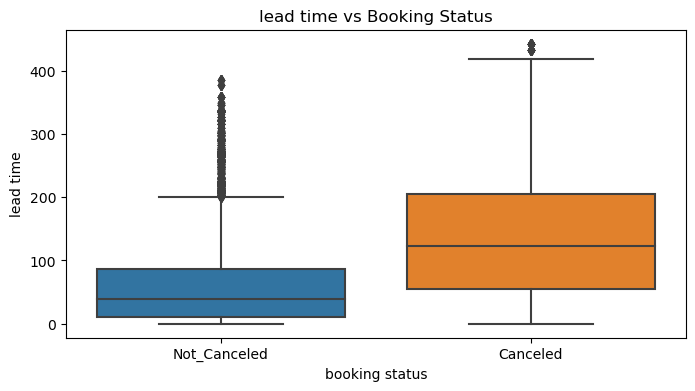

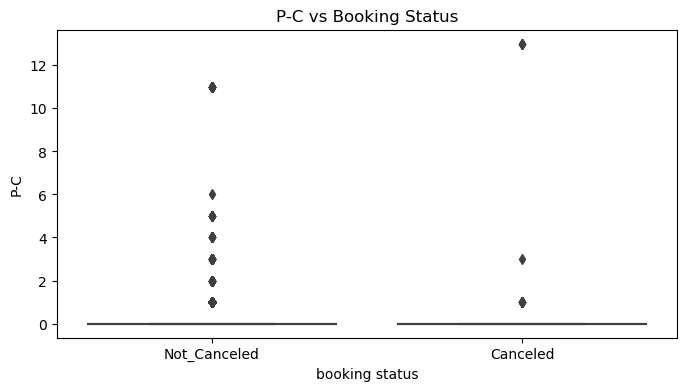

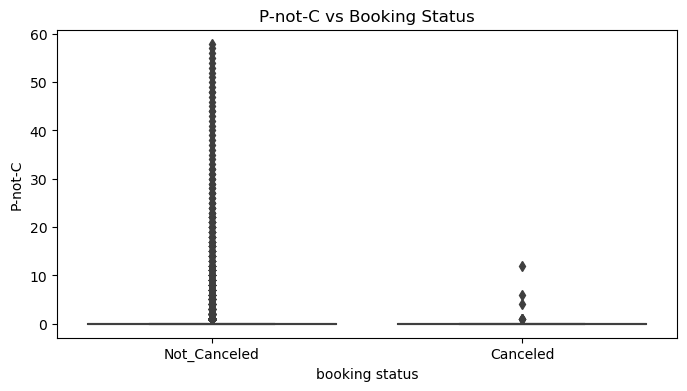

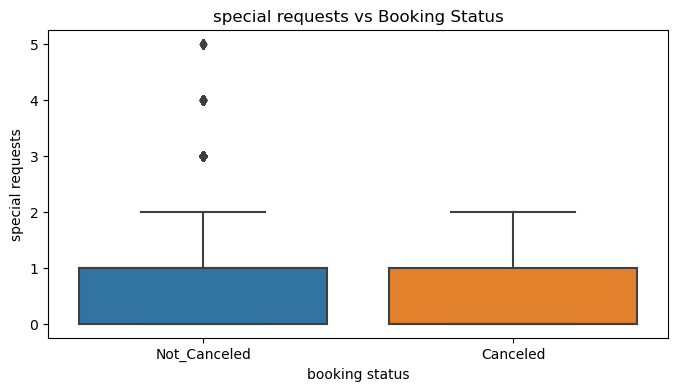

In [21]:
num_cols = [
    'number of adults', 'number of children', 
    'number of weekend nights', 'number of week nights', 
    'car parking space', 'lead time', 
    'P-C', 'P-not-C', 'average price', 'special requests'
]
status = data['booking status']
for col in num_cols:
    if col in data.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=status, y=data[col])
        plt.title(f'{col} vs Booking Status')
        plt.show()

# 4-Multivariate Analysis📊

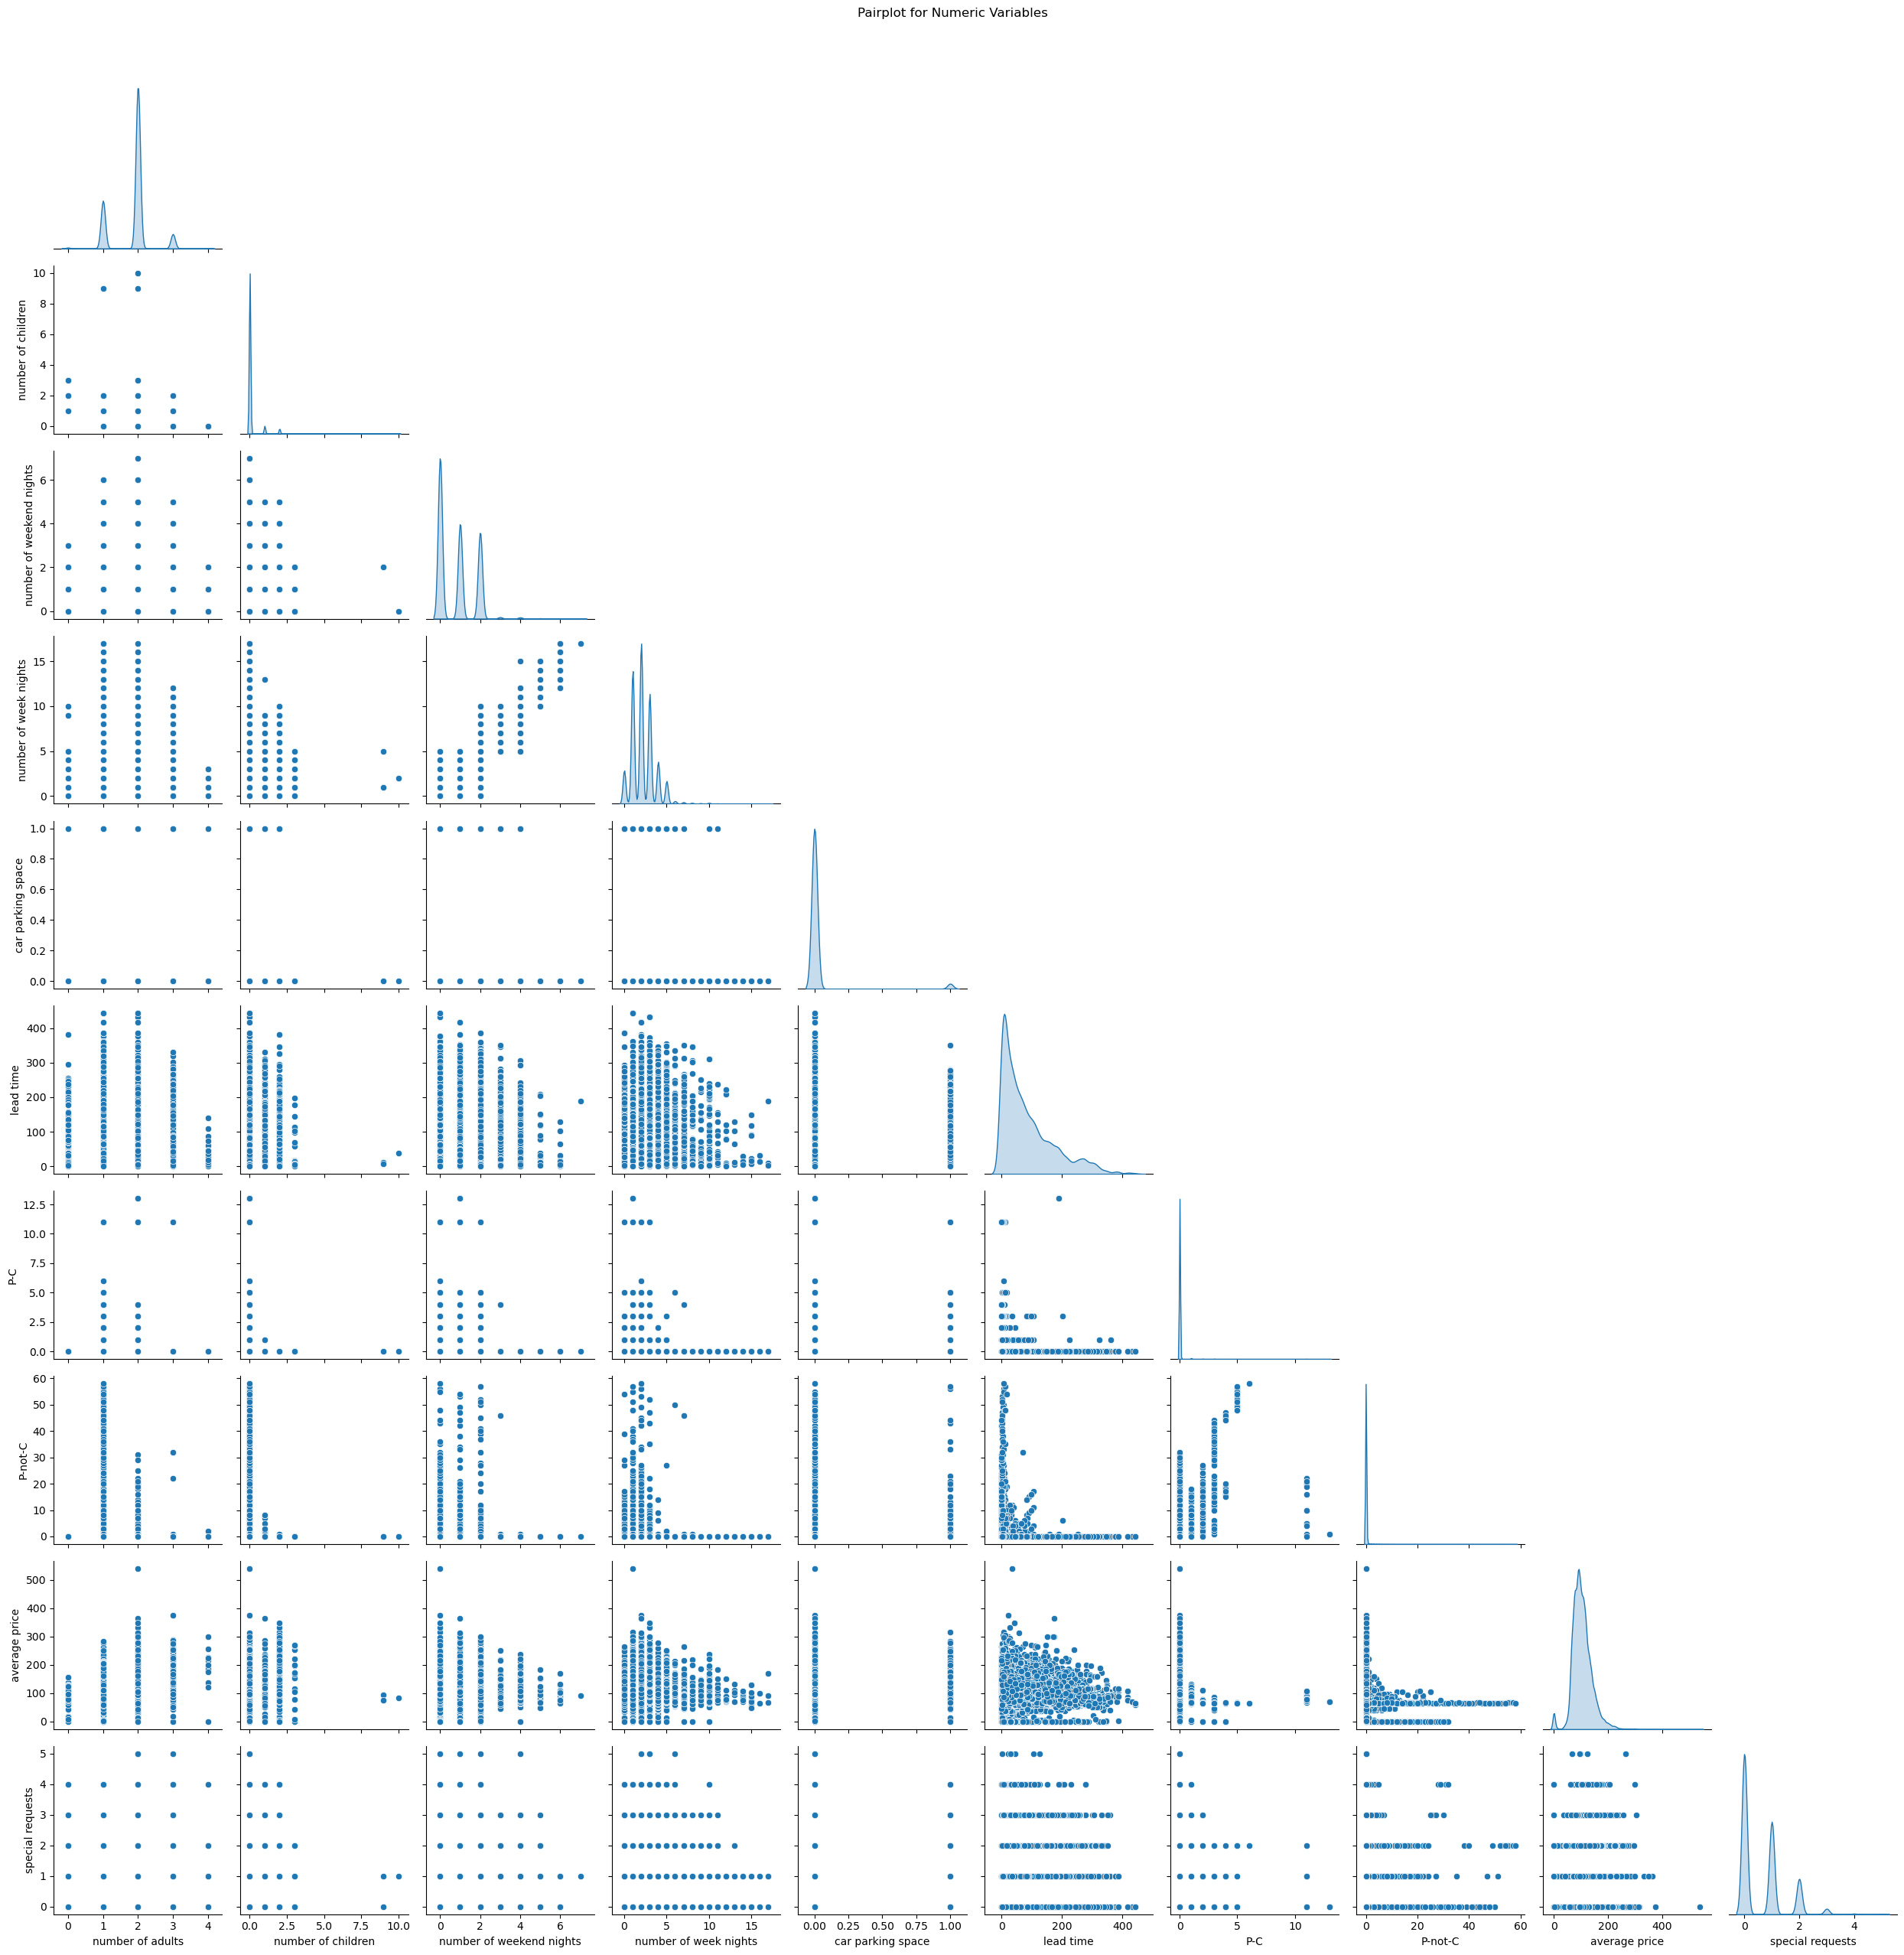

In [22]:
data.columns = data.columns.str.strip()
data['date of reservation'] = pd.to_datetime(data['date of reservation'], errors='coerce')
data = data.dropna(subset=['date of reservation'])
data['reservation_year'] = data['date of reservation'].dt.year
data['reservation_month'] = data['date of reservation'].dt.month
numeric_cols = [
    'number of adults', 'number of children', 
    'number of weekend nights', 'number of week nights', 
    'car parking space', 'lead time', 
    'P-C', 'P-not-C', 'average price', 'special requests'
]
sns.pairplot(data[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairplot for Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()


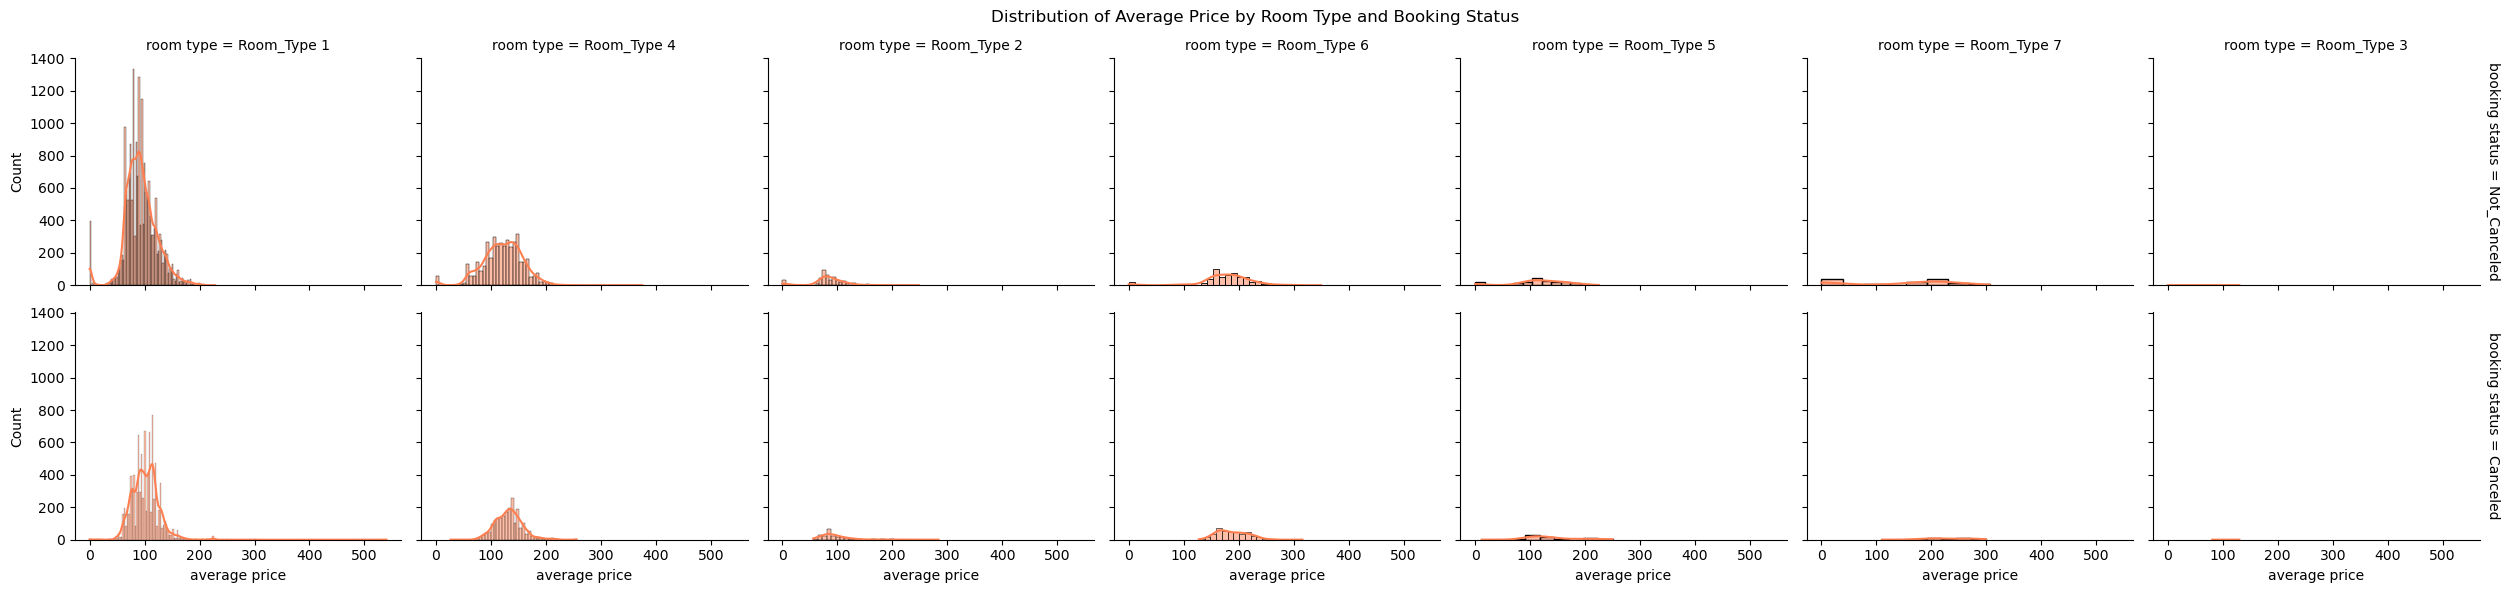

In [23]:
g = sns.FacetGrid(data, col='room type', row='booking status', margin_titles=True, height=3, aspect=1.2)
g.map(sns.histplot, 'average price', kde=True, color='coral')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Average Price by Room Type and Booking Status')
plt.show()

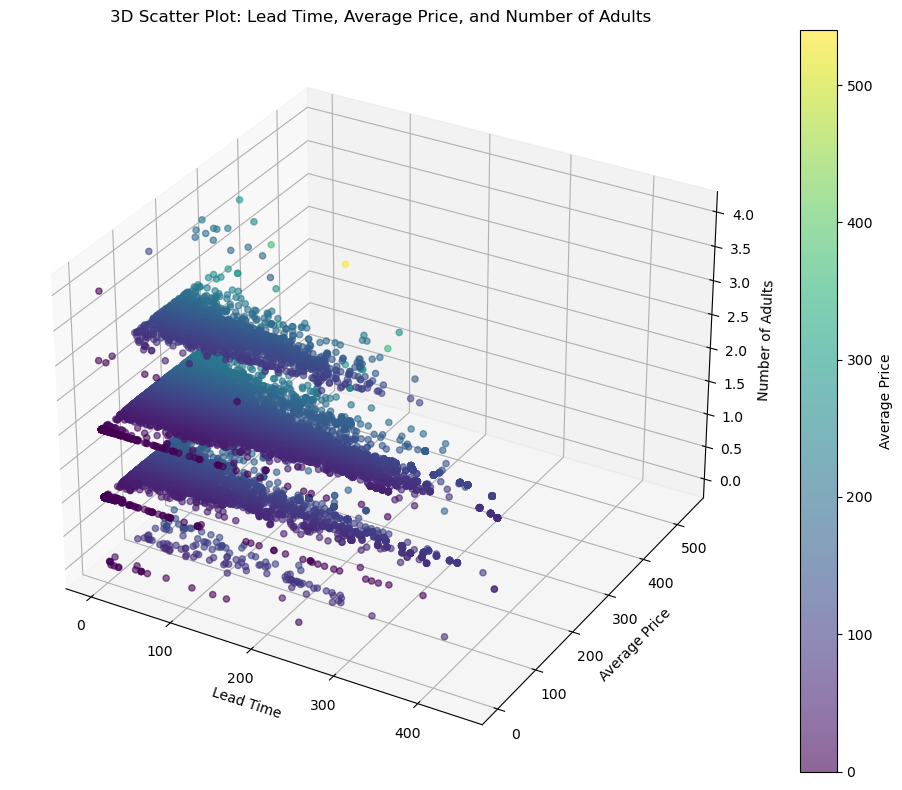

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    data['lead time'], 
    data['average price'], 
    data['number of adults'],
    c=data['average price'], cmap='viridis', alpha=0.6
)
ax.set_xlabel('Lead Time')
ax.set_ylabel('Average Price')
ax.set_zlabel('Number of Adults')
plt.title('3D Scatter Plot: Lead Time, Average Price, and Number of Adults')
fig.colorbar(sc, ax=ax, label='Average Price')
plt.tight_layout()
plt.show()

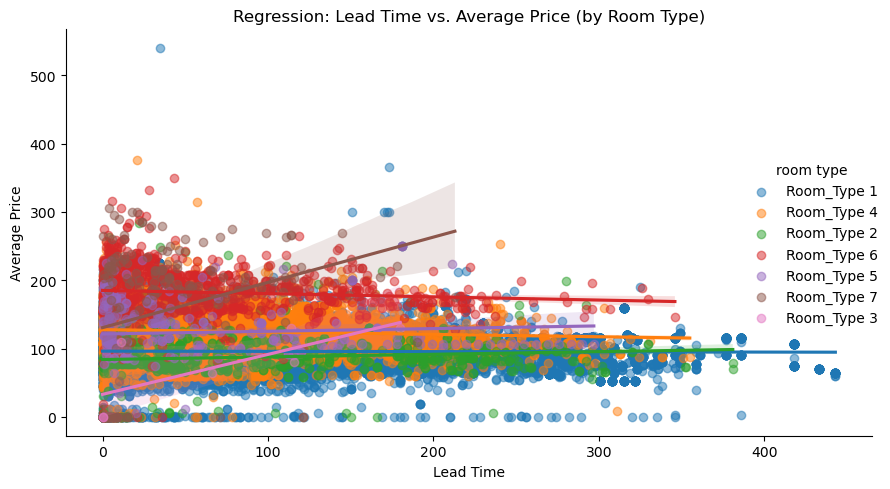

In [25]:
sns.lmplot(
    x='lead time', y='average price',
    hue='room type',
    data=data,
    aspect=1.5, scatter_kws={'alpha':0.5}
)
plt.title('Regression: Lead Time vs. Average Price (by Room Type)')
plt.xlabel('Lead Time')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

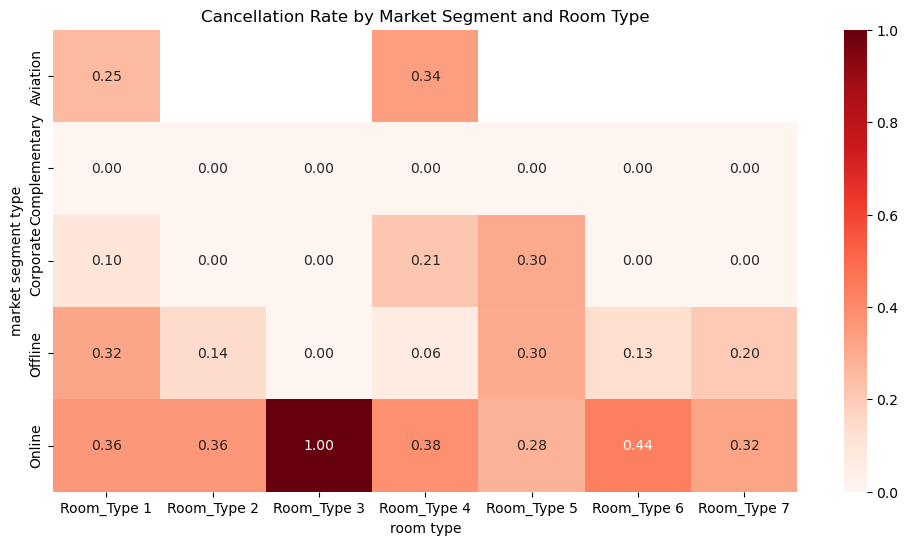

In [26]:
pivot_table = data.pivot_table(
    index='market segment type', 
    columns='room type', 
    values='booking status', 
    aggfunc=lambda x: (x == 'Canceled').mean()  
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Reds')
plt.title('Cancellation Rate by Market Segment and Room Type')
plt.show()

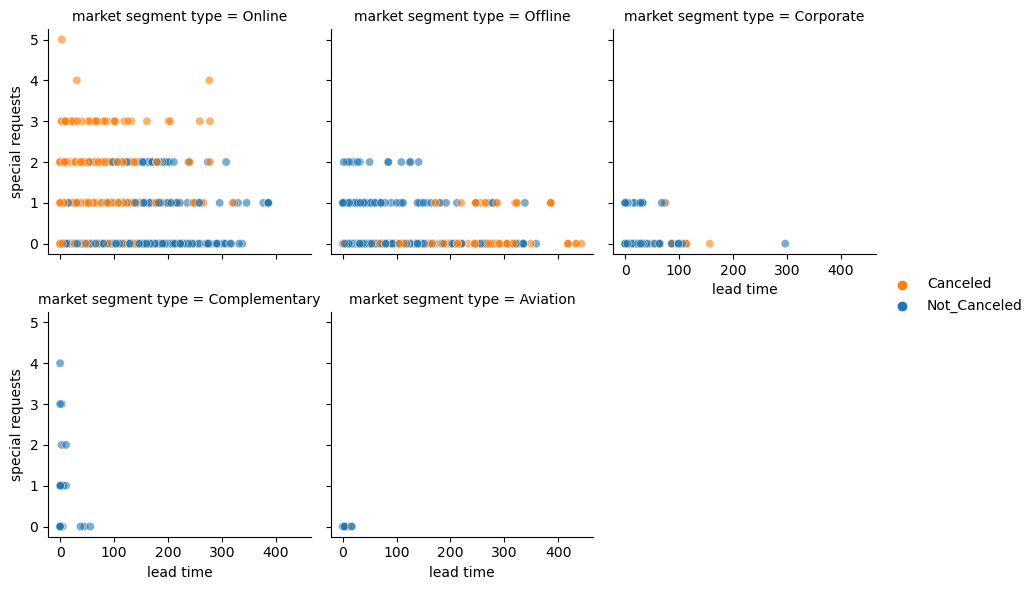

In [27]:
g = sns.FacetGrid(data=data.sample(2000), col='market segment type', col_wrap=3, height=3)
g.map_dataframe(sns.scatterplot, x='lead time', y='special requests', hue='booking status', alpha=0.6)
g.add_legend()
plt.show()

<a id='AskingandAnsweringQuestions'></a>

# Asking and Answering Questions🎯

## 1. What is the distribution of the number of adults per booking?

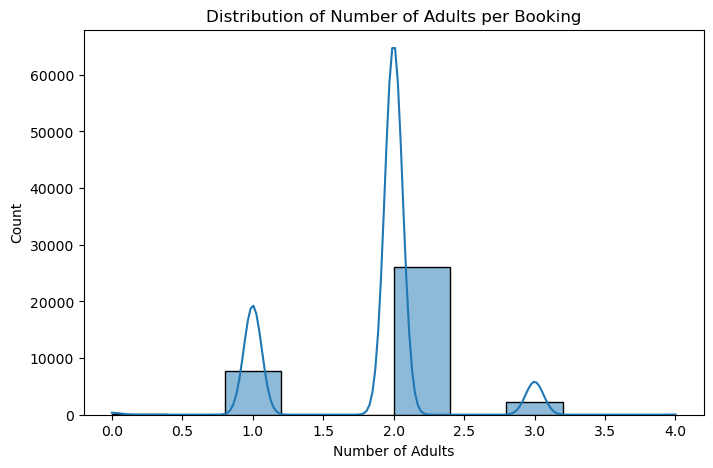

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(data['number of adults'], bins=10, kde=True)
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.title('Distribution of Number of Adults per Booking')
plt.show()

## 2. Which room type is booked the most?

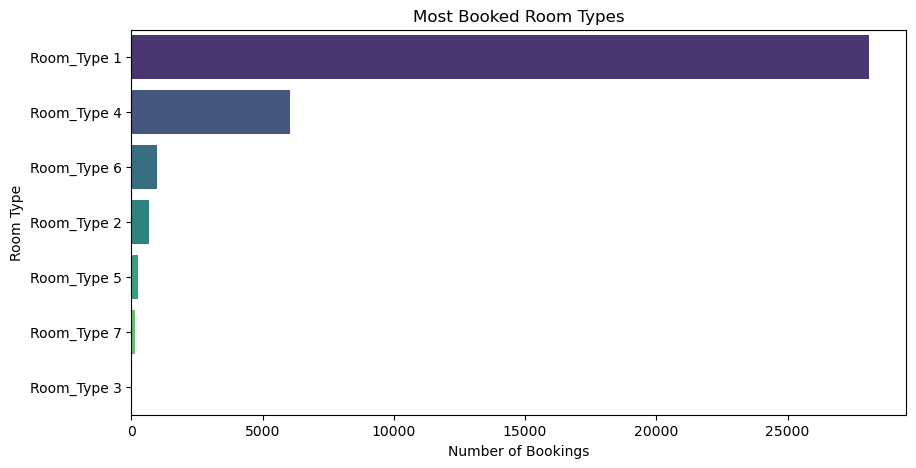

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(y=data['room type'], order=data['room type'].value_counts().index, palette='viridis')
plt.xlabel('Number of Bookings')
plt.ylabel('Room Type')
plt.title('Most Booked Room Types')
plt.show()


## 3. What is the trend of reservations across different months?

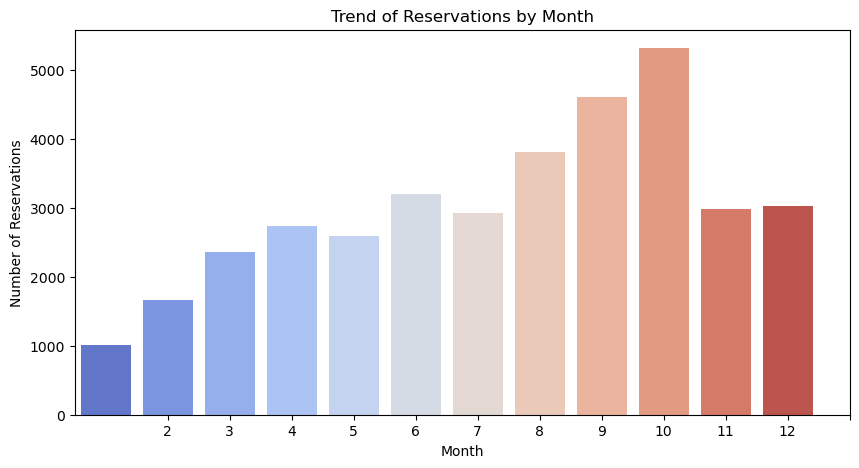

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data['reservation_month'], palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.title('Trend of Reservations by Month')
plt.xticks(range(1, 13))
plt.show()


## 4. How does lead time impact the average price of bookings?


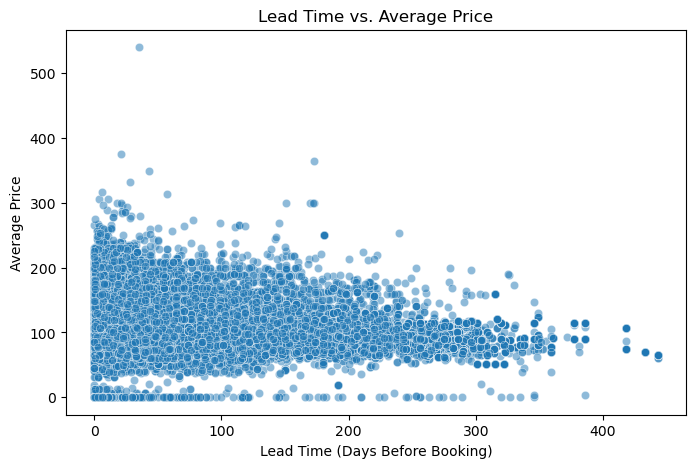

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['lead time'], y=data['average price'], alpha=0.5)
plt.xlabel('Lead Time (Days Before Booking)')
plt.ylabel('Average Price')
plt.title('Lead Time vs. Average Price')
plt.show()


## 5. Do guests with more special requests pay higher prices?plt.figure(figsize=(12, 6))

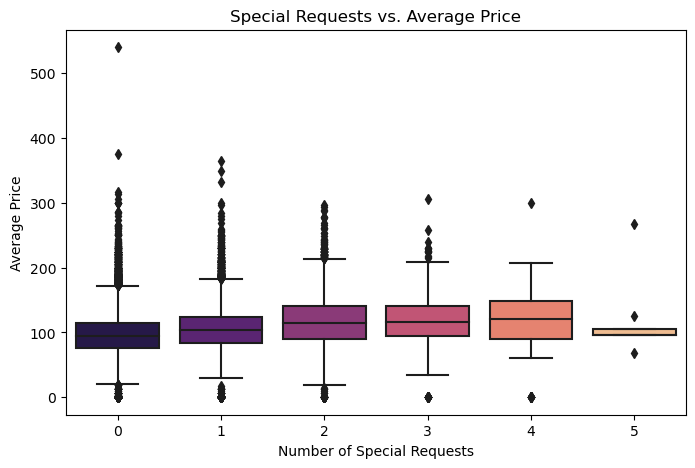

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['special requests'], y=data['average price'], palette='magma')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Price')
plt.title('Special Requests vs. Average Price')
plt.show()


## 6. How many bookings are repeated vs. new?


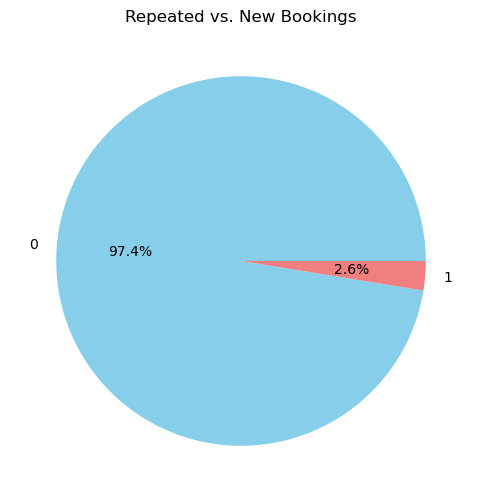

In [33]:
plt.figure(figsize=(6, 6))
data['repeated'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Repeated vs. New Bookings')
plt.ylabel('')
plt.show()


 ## 7.What is the most popular meal type chosen by customers?


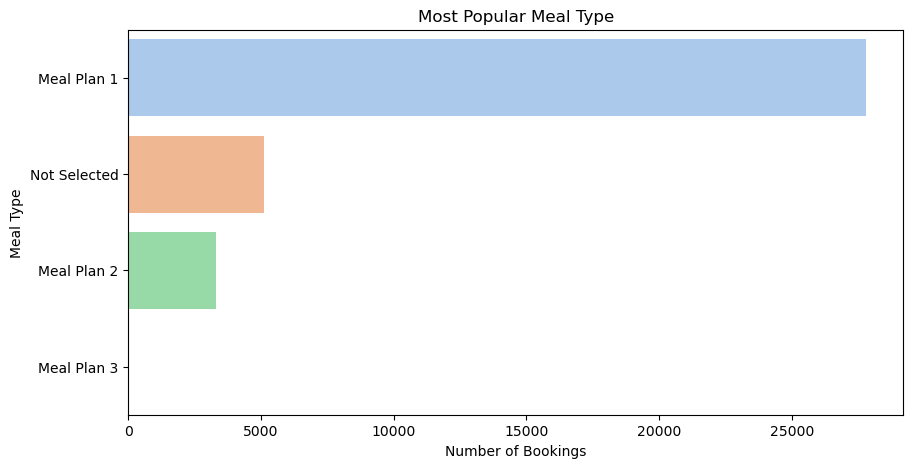

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(y=data['type of meal'], order=data['type of meal'].value_counts().index, palette='pastel')
plt.xlabel('Number of Bookings')
plt.ylabel('Meal Type')
plt.title('Most Popular Meal Type')
plt.show()


# 8.How does the number of children impact the lead time?


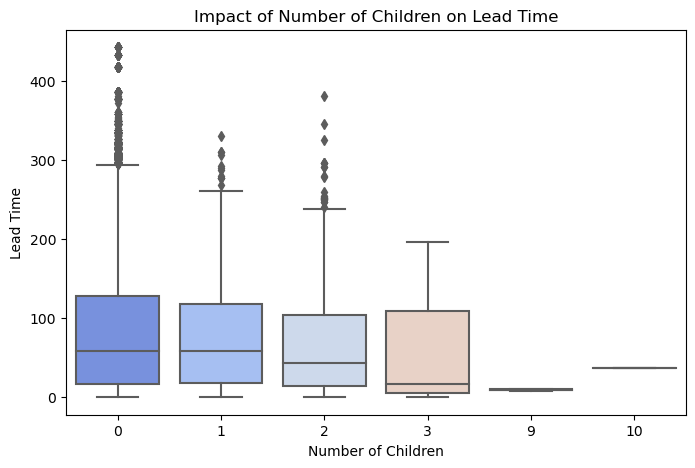

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['number of children'], y=data['lead time'], palette='coolwarm')
plt.xlabel('Number of Children')
plt.ylabel('Lead Time')
plt.title('Impact of Number of Children on Lead Time')
plt.show()


## 9.Which market segment contributes the most bookings?


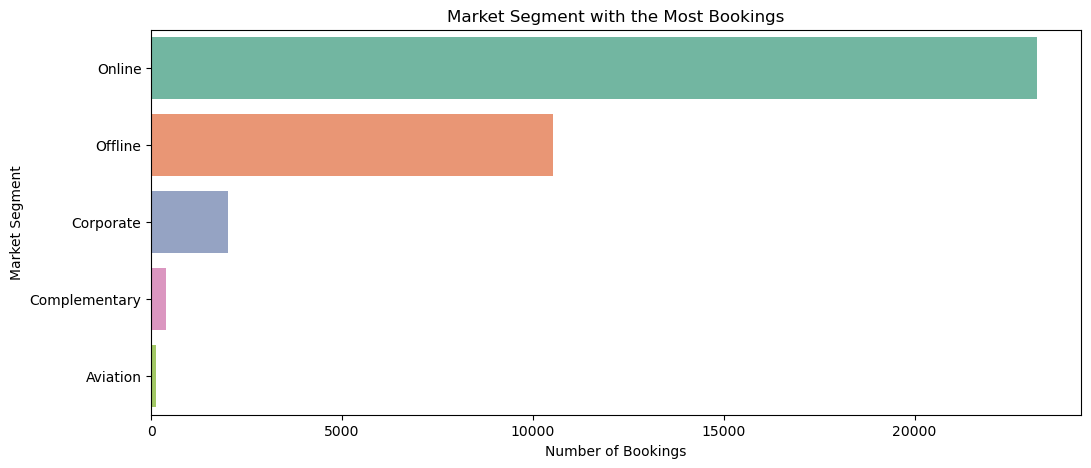

In [36]:
plt.figure(figsize=(12, 5))
sns.countplot(y=data['market segment type'], order=data['market segment type'].value_counts().index, palette='Set2')
plt.xlabel('Number of Bookings')
plt.ylabel('Market Segment')
plt.title('Market Segment with the Most Bookings')
plt.show()


## 10.What is the distribution of the number of weekend and week nights?


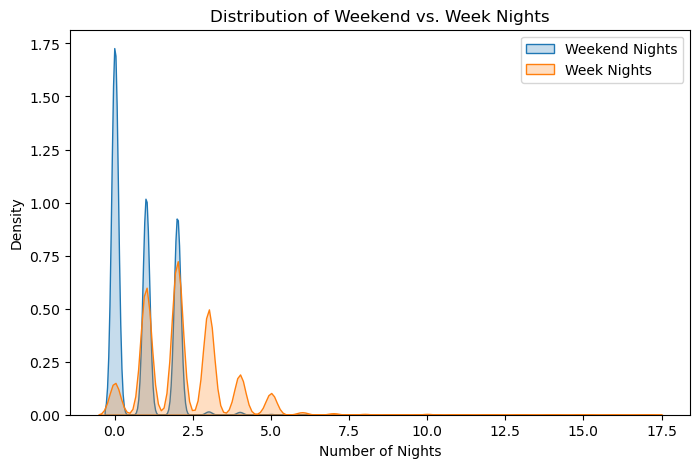

In [37]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data['number of weekend nights'], label='Weekend Nights', shade=True)
sns.kdeplot(data['number of week nights'], label='Week Nights', shade=True)
plt.xlabel('Number of Nights')
plt.ylabel('Density')
plt.title('Distribution of Weekend vs. Week Nights')
plt.legend()
plt.show()

## 11. How do repeated guests compare to new guests in terms of average price?


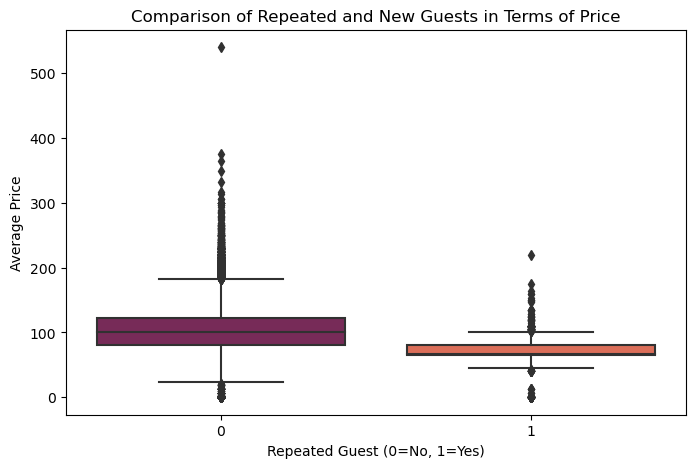

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['repeated'], y=data['average price'], palette='rocket')
plt.xlabel('Repeated Guest (0=No, 1=Yes)')
plt.ylabel('Average Price')
plt.title('Comparison of Repeated and New Guests in Terms of Price')
plt.show()

## 12. What are the most common special request counts?

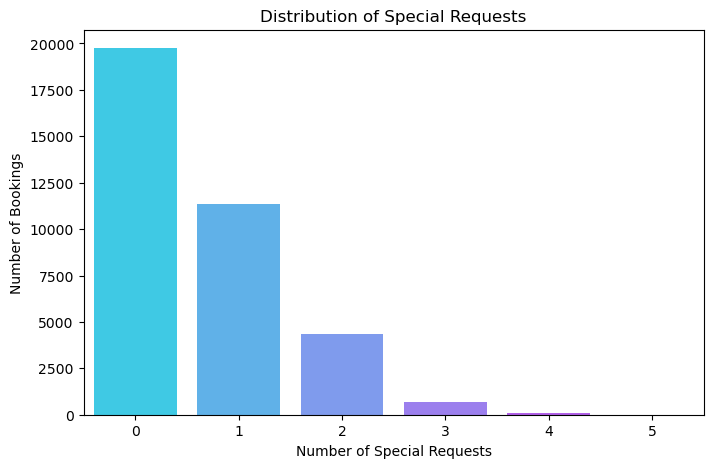

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['special requests'], palette='cool')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.title('Distribution of Special Requests')
plt.show()


## 13. How does car parking space availability relate to the number of adults in bookings?


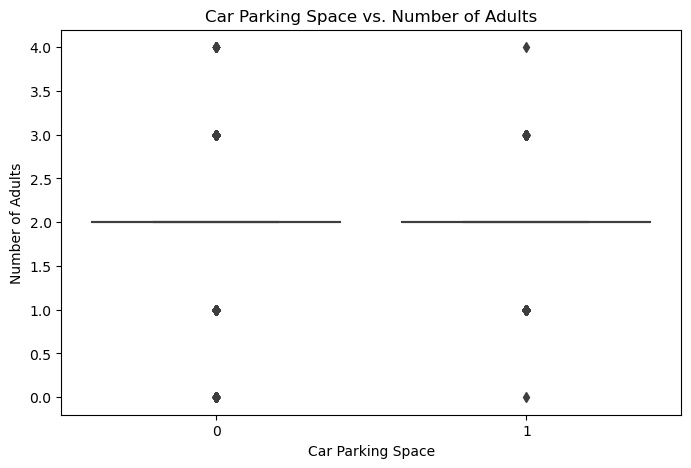

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['car parking space'], y=data['number of adults'], palette='flare')
plt.xlabel('Car Parking Space')
plt.ylabel('Number of Adults')
plt.title('Car Parking Space vs. Number of Adults')
plt.show()


## 14. Do customers booking with longer lead times have more special requests?


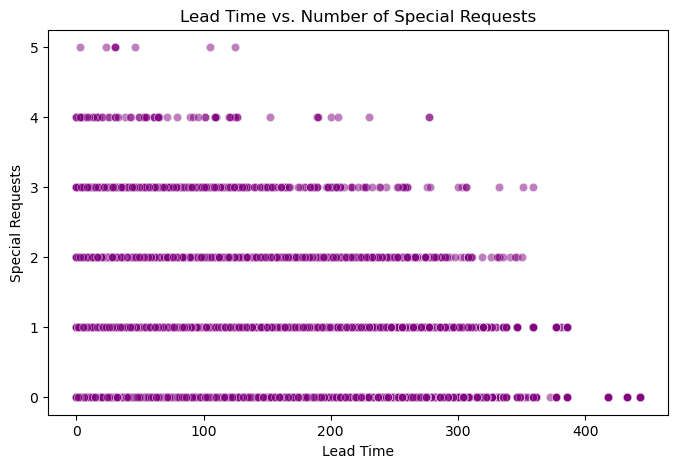

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['lead time'], y=data['special requests'], alpha=0.5, color='purple')
plt.xlabel('Lead Time')
plt.ylabel('Special Requests')
plt.title('Lead Time vs. Number of Special Requests')
plt.show()

## 15. What is the trend of average price across different months?


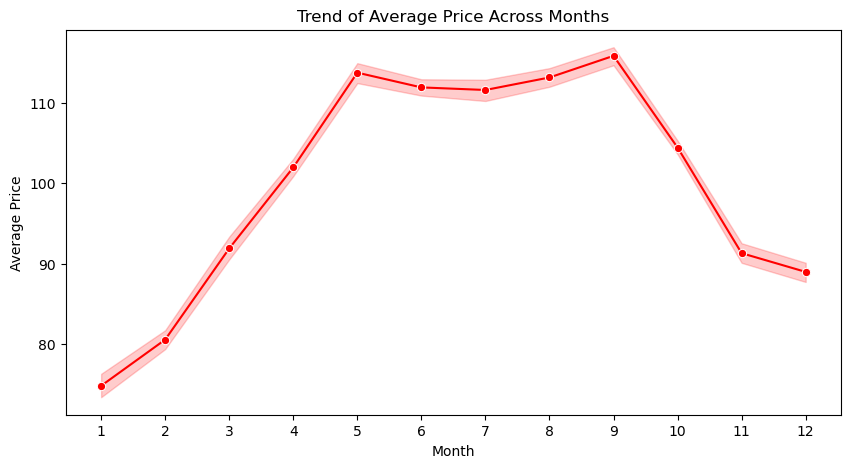

In [42]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=data['reservation_month'], y=data['average price'], marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Trend of Average Price Across Months')
plt.xticks(range(1, 13))
plt.show()

### Made by : Menna Khaled